from sklearn.impute import KNNImputer

hotel_columns = hotel.columns

knn = KNNImputer(n_neighbors = 5)
hotel_df = pd.DataFrame(knn.fit_transform(hotel), columns = hotel_columns)
hotel_df.head()

In [1]:
#Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import country_converter as coco

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data

hotel = pd.read_csv('hotel_bookings.csv')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
hotel.shape

(119390, 32)

### Missing value treatment

In [4]:
#Checking the count of missing values

hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
# Checking the missing percentage

round((hotel.isnull().sum()/len(hotel)*100),2)

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [6]:
# Going to drop company as it has lot of missing values

hotel.drop(['company','agent','reservation_status_date'], axis = 1, inplace = True)

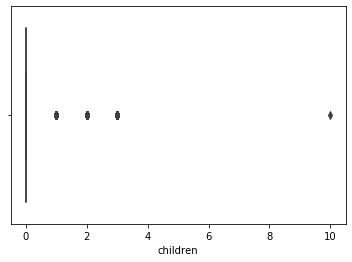

In [7]:
# looking at the box plot we can say we want to impute with the median for the missing values for children

sns.boxplot(hotel['children'])

In [8]:
#Imputing with the median

hotel['children'].fillna(hotel['children'].median(), inplace = True)

In [9]:
# Checking the value count for the country

hotel['country'].astype('category').value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
NAM        1
NCL        1
DMA        1
NIC        1
BHS        1
Name: country, Length: 177, dtype: int64

In [10]:
# Imputing the missing values in the country with PRT

hotel['country'].fillna('PRT', inplace = True)

In [11]:
# Once again checking the missing value count to see that we have taken care of all the missing values 

hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Outlier Analysis

In [12]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# we notice that the reservation_status_date is date time so we will change the data type

hotel['reservation_status_date'] = pd.to_datetime(hotel['reservation_status_date'])
print(hotel['reservation_status_date'].dtype)

In [13]:
# Sub-setting the data type to numeric dataset

hotel_numeric = hotel.select_dtypes(include = ['float64', 'int64'])

In [14]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


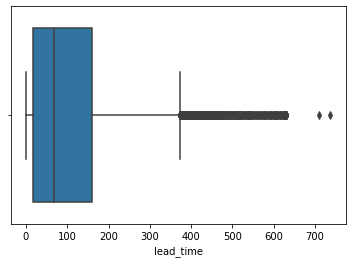

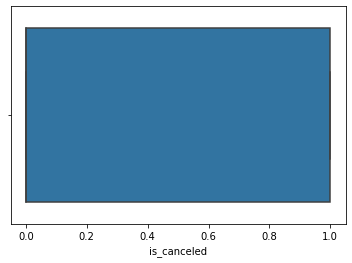

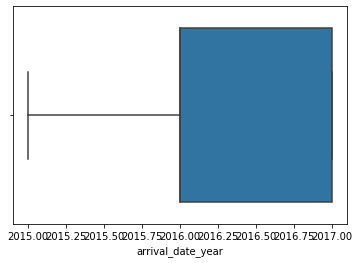

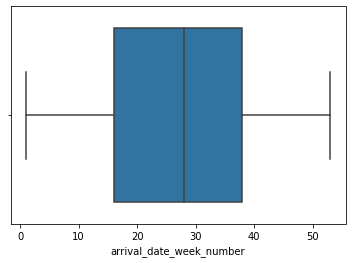

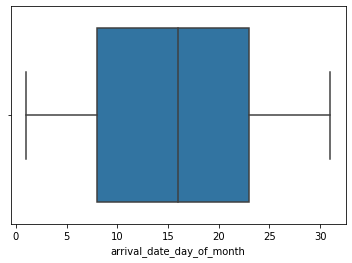

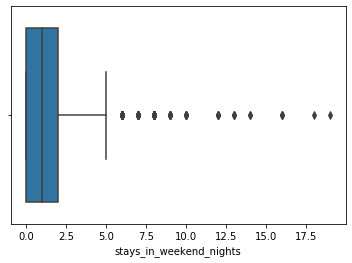

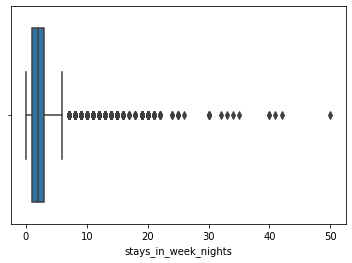

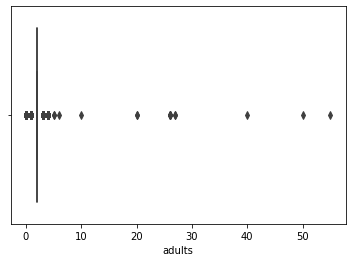

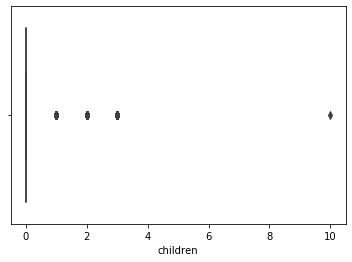

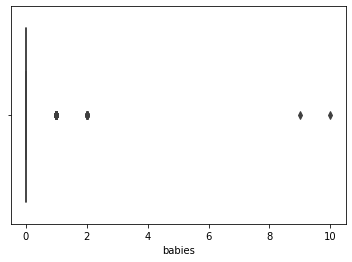

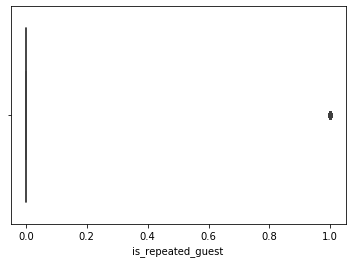

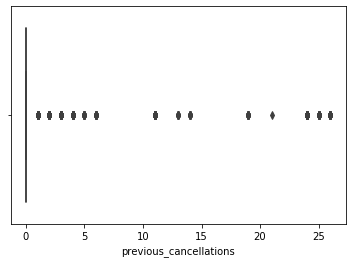

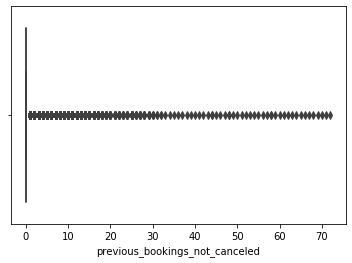

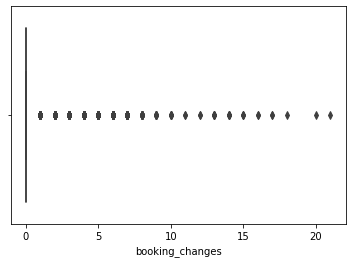

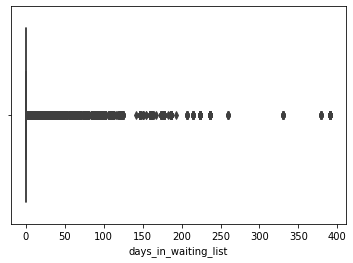

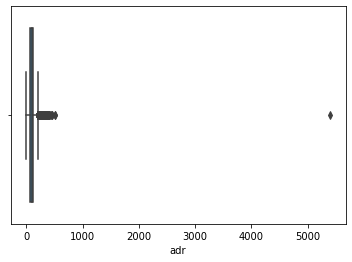

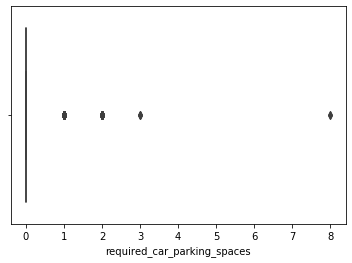

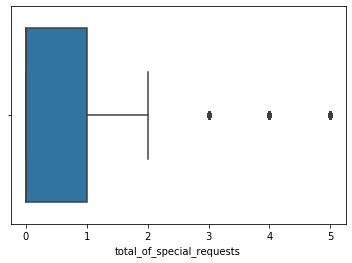

In [15]:
#Plotting box plot for all the numeric columns to check for outliers

plt.figure()

for i, col in enumerate(hotel_numeric.columns):
    plt.figure(i)
    sns.boxplot(hotel_numeric[col])

- Looking at the graphs we can see that the outliers are present in some features, so we will subset those features into a list and perform outlier treatment

In [16]:
#Outlier treatment

kappa = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr','required_car_parking_spaces']

for i in kappa:
    q1 = hotel[i].quantile(0.01)
    q4 = hotel[i].quantile(0.99)
    hotel = hotel[(hotel[i] >= q1) & (hotel[i] <= q4)]
hotel.shape

(111176, 29)

In [17]:
hotel = hotel.reset_index(drop = True)
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
2,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [18]:
# Over-writing the hotel_numeric data, with the updated hotel dataframe

hotel_numeric = hotel.select_dtypes(include = ['float64', 'int64'])

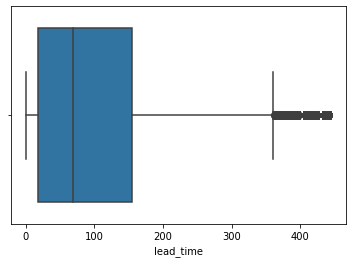

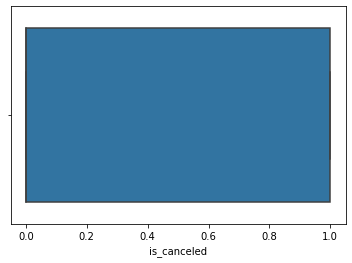

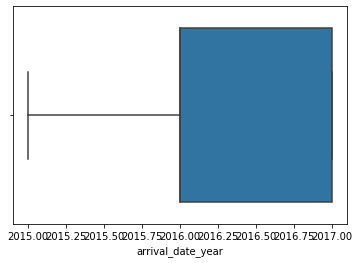

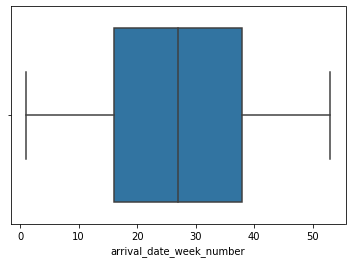

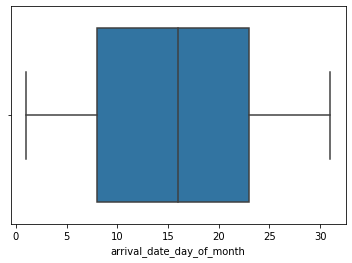

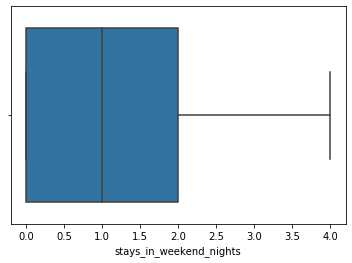

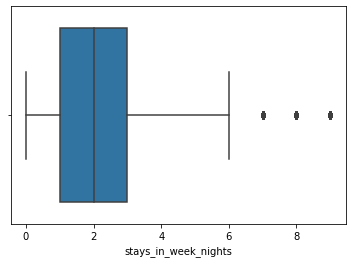

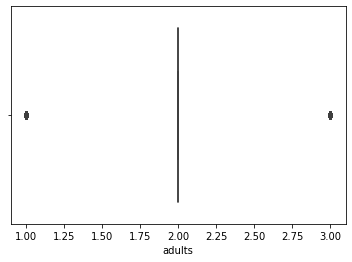

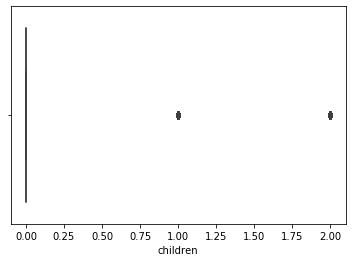

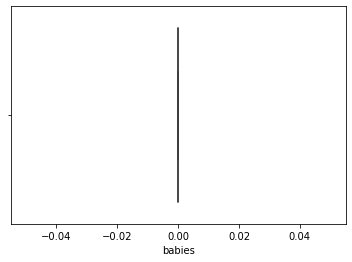

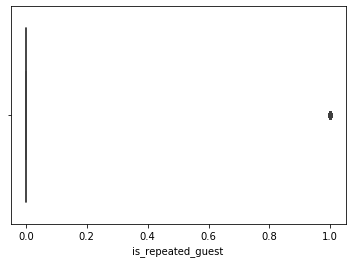

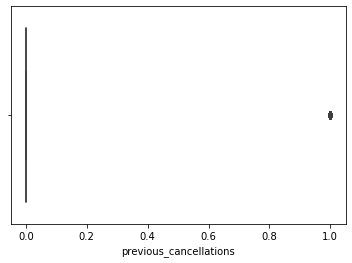

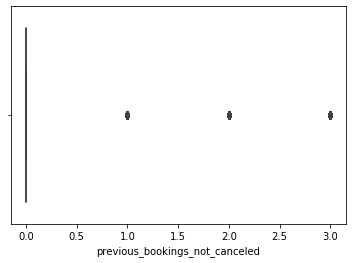

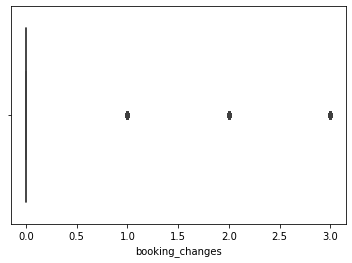

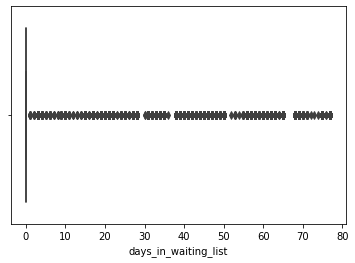

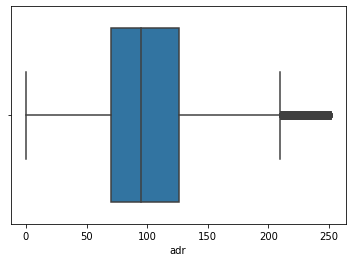

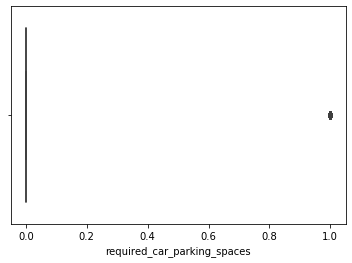

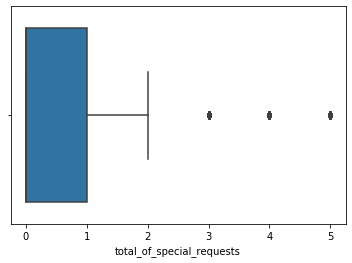

In [19]:
# Re-checking the data for outliers

plt.figure()

for i, col in enumerate(hotel_numeric.columns):
    plt.figure(i)
    sns.boxplot(hotel_numeric[col])

### EDA 

In [20]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
2,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


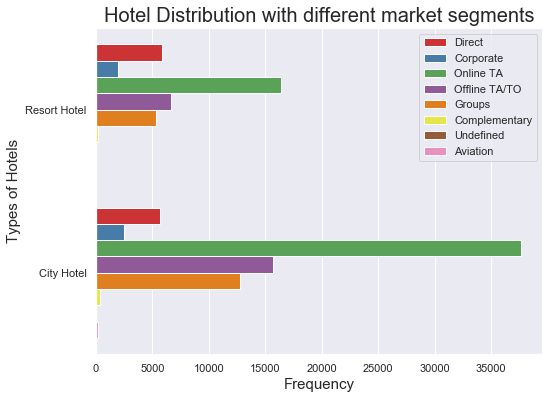

In [21]:
# Lets look at which has more number of hotel city or resort along with market segment

sns.set()
plt.figure(figsize = (8,6))

sns.countplot(y = hotel['hotel'], hue = hotel['market_segment'], palette="Set1")

plt.title('Hotel Distribution with different market segments', fontsize = 20)
plt.xlabel('Frequency',fontsize = 15)
plt.ylabel('Types of Hotels', fontsize = 15)
plt.legend(loc = 'upper right')
plt.show()

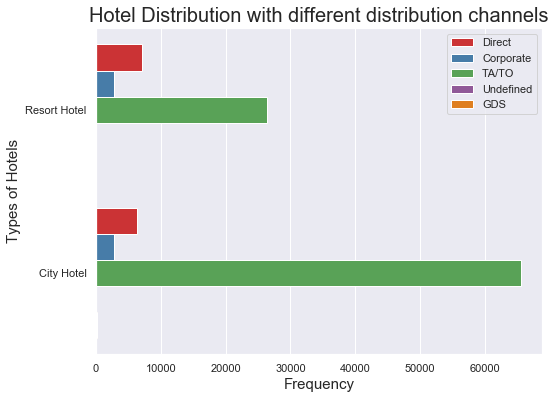

In [22]:
# Lets look at which has more number of hotel city or resort along with distribution channel

sns.set()
plt.figure(figsize = (8,6))

sns.countplot(y = hotel['hotel'], hue = hotel['distribution_channel'], palette="Set1")

plt.title('Hotel Distribution with different distribution channels', fontsize = 20)
plt.xlabel('Frequency',fontsize = 15)
plt.ylabel('Types of Hotels', fontsize = 15)
plt.legend(loc = 'upper right')
plt.show()

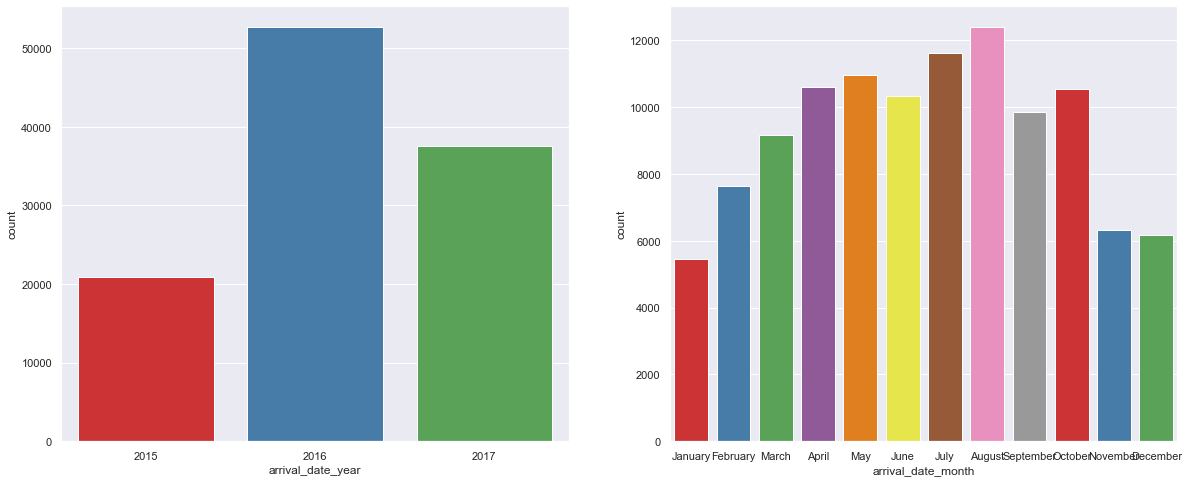

In [23]:
# Observing which year and month as the highest demand

plt.figure(figsize = (20,8))

#fig.tight_layout(pad = 30)
plt.subplot(1,2,1)
#plt.figure(figsize = (5,5))
sns.countplot(hotel['arrival_date_year'], palette = 'Set1')

plt.subplot(1,2,2)
#plt.figure(figsize = (5,5))
sns.countplot(hotel['arrival_date_month'], order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'], palette = 'Set1')


plt.show()

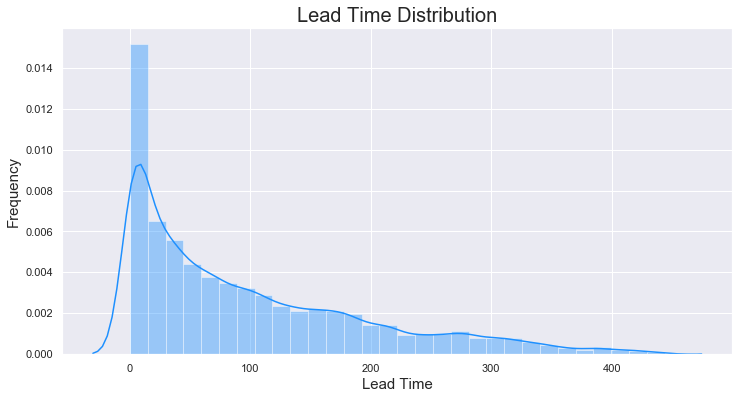

In [24]:
#Lead time distribution
 ## Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

plt.figure(figsize = (12,6))

sns.distplot(hotel['lead_time'],color="dodgerblue", bins = 30)

plt.title('Lead Time Distribution', fontsize = 20)
plt.ylabel('Frequency',fontsize = 15)
plt.xlabel('Lead Time', fontsize = 15)
plt.show()

In [25]:
pd.set_option('display.max_columns', None)
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
2,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


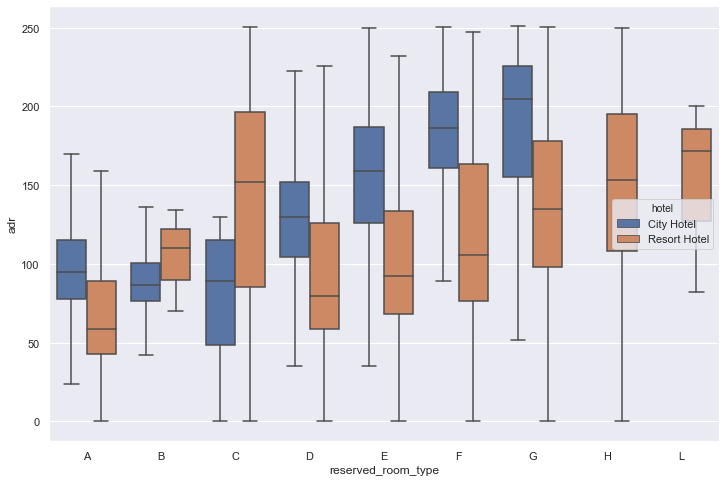

In [26]:
# How much do guest pay for every night? adr = average daily rate

#hotel["adr_pp"] = hotel["adr"] / (hotel["adults"] + hotel["children"])

actual_guest = hotel.loc[hotel['is_canceled'] == 0]

room_prices = actual_guest[["hotel", "reserved_room_type", "adr"]].sort_values('reserved_room_type')

plt.figure(figsize = (12,8))

sns.boxplot(x = "reserved_room_type", y = "adr", hue ="hotel", data = room_prices, fliersize = 0)

plt.show()

In [27]:
#Classifying the countries into contienets

cc = coco.CountryConverter() # module name
continents = []

for i, row in hotel.iterrows():
    continent = cc.convert([row["country"]], to = 'continent')
    continents.append(continent)
continent_df = pd.DataFrame(continents, columns = ['Continent'])
hotel = pd.concat([hotel, continent_df], 1)

In [28]:
# Checking the value count of the contient column

hotel['Continent'].value_counts()

Europe        100740
America         4722
Asia            4303
Africa           938
Oceania          468
not found          3
Antarctica         2
Name: Continent, dtype: int64

In [29]:
# we will drop the country column from the data frame since we have continets now

hotel = hotel.drop('country', axis = 1)

In [30]:
# we will replace the countries which are not found to europe

hotel['Continent']= hotel['Continent'].replace('not found' , "Europe") 

In [31]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Continent
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,Europe
1,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,Europe
2,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,Europe
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,Europe
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,Europe


In [32]:
hotel['Continent'].value_counts()

Europe        100743
America         4722
Asia            4303
Africa           938
Oceania          468
Antarctica         2
Name: Continent, dtype: int64

In [33]:
# We will just look into the top 10 countries

continent_df = pd.DataFrame(hotel["Continent"].value_counts())

continent_df.rename(columns={"Continent": "Number of People"}, inplace=True)
total_guests = continent_df["Number of People"].sum()
continent_df["Guests in %"] = round(continent_df["Number of People"] / total_guests * 100, 2)
continent_df["Continent"] = continent_df.index
continent_df.head(6)

,Number of People,Guests in %,Continent
Europe,100743,90.62,Europe
America,4722,4.25,America
Asia,4303,3.87,Asia
Africa,938,0.84,Africa
Oceania,468,0.42,Oceania
Antarctica,2,0.00,Antarctica


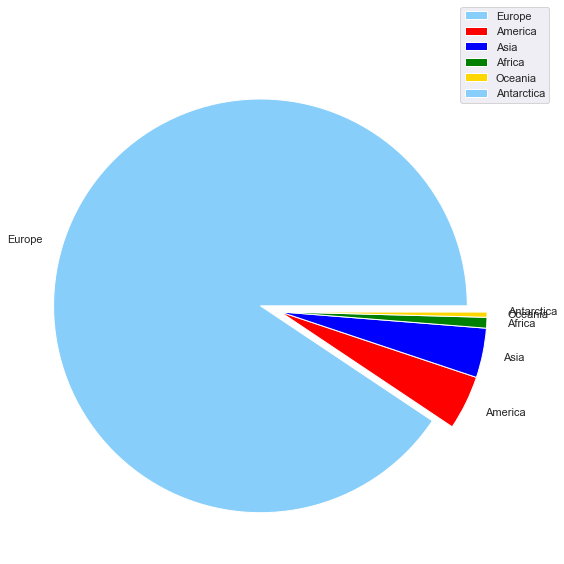

In [34]:
# From which continet where the most number of customers

plt.figure(figsize = (8,8))
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold'] 
explode = (0.1, 0, 0, 0, 0, 0)

fig = plt.pie(continent_df['Guests in %'], labels = continent_df['Continent'], explode = explode, colors = colors, shadow=False)

plt.axis('equal')
plt.legend(loc = 'center',bbox_to_anchor=(1,1))
plt.tight_layout()

In [35]:
# checking the value count of babies

hotel_numeric['babies'].value_counts()

0    111176
Name: babies, dtype: int64

In [36]:
# we will drop the babies column from the main data frame as well
## as it is completelely skewwed and has only one value of 0

hotel = hotel.drop('babies', axis =1)

In [37]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Continent
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,Europe
1,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,Europe
2,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,Europe
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,Europe
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,Europe


In [38]:
#Overwrting hotel numeric
hotel_numeric = hotel_numeric.drop('babies', axis =1)

In [39]:
# Lets look into the statistical summary
hotel_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,111176.0,0.370044,0.482818,0.0,0.0,0.0,1.000,1.0
lead_time,111176.0,99.130874,98.696834,0.0,18.0,68.0,155.000,444.0
arrival_date_year,111176.0,2016.149915,0.709563,2015.0,2016.0,2016.0,2017.000,2017.0
arrival_date_week_number,111176.0,27.089300,13.605238,1.0,16.0,27.0,38.000,53.0
arrival_date_day_of_month,111176.0,15.794074,8.772191,1.0,8.0,16.0,23.000,31.0
stays_in_weekend_nights,111176.0,0.889688,0.901854,0.0,0.0,1.0,2.000,4.0
stays_in_week_nights,111176.0,2.385065,1.561308,0.0,1.0,2.0,3.000,9.0
adults,111176.0,1.860527,0.474085,1.0,2.0,2.0,2.000,3.0
children,111176.0,0.091971,0.368743,0.0,0.0,0.0,0.000,2.0
is_repeated_guest,111176.0,0.023944,0.152875,0.0,0.0,0.0,0.000,1.0


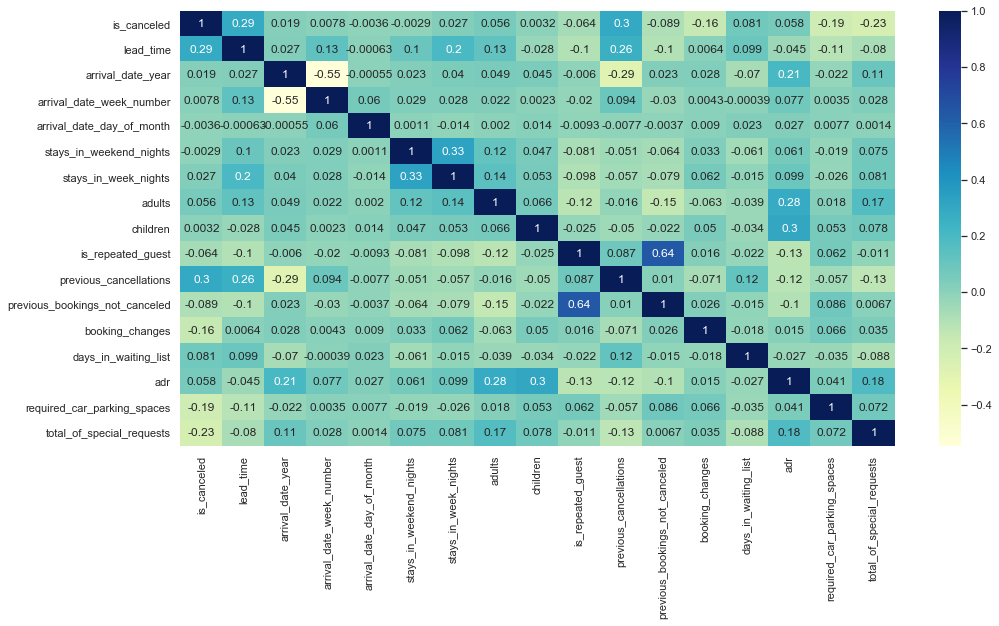

In [40]:
# Checking the corealtion

plt.figure(figsize = (16,8))
sns.heatmap(hotel_numeric.corr(), cmap = 'YlGnBu', annot = True)

- From the above heat map we can see a significant coreealtion between is_reapted_guest and previous_bookings_not_cancaled

## Data Preparation

In [41]:
# We will map hotel into resort and city hotels

hotel['hotel'] = hotel['hotel'].map({'Resort Hotel': 1, "City Hotel": 0})

In [42]:
hotel_categorical = hotel.select_dtypes(include = ['object'])

In [43]:
#Creating  Dummies for all the categorical labels

hotel_dummies = pd.get_dummies(hotel_categorical, drop_first=True)
hotel_dummies.head()

,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,Continent_America,Continent_Antarctica,Continent_Asia,Continent_Europe,Continent_Oceania
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [44]:
# we will remove the columns for which the dummies are created

hotel = hotel.drop(list(hotel_categorical.columns), axis=1)

In [45]:
#Merging the data set and creating one main data set

hotel = pd.concat([hotel,hotel_dummies], axis=1)
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,Continent_America,Continent_Antarctica,Continent_Asia,Continent_Europe,Continent_Oceania
0,1,0,342,2015,27,1,0,0,2,0.0,0,0,0,3,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,1,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,75.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,1,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,75.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,1,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,98.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4,1,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,98.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


This is the final dataframe on which we will start to build the model<br>
<br>
We will build 2 models one for resort hotel and another for city hotel
<br>


In [46]:
hotel['is_canceled'].value_counts()

0    70036
1    41140
Name: is_canceled, dtype: int64

In [47]:
# Lets the check the cancellation rate

c_rate = round(100*(sum(hotel['is_canceled'])/len(hotel['is_canceled'])),2)
print('Hotel Cancellation Rate is {0}'.format(c_rate))

Hotel Cancellation Rate is 37.0


### Train test split

In [48]:
X = hotel.drop('is_canceled', axis = 1)
y = hotel['is_canceled']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state = 42)

### Scaling

In [50]:
# Scaling using standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                        #StandardScaler()

X_train[hotel_numeric.columns[1:]] = scaler.fit_transform(X_train[hotel_numeric.columns[1:]])
X_train.head()

,hotel,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,Continent_America,Continent_Antarctica,Continent_Asia,Continent_Europe,Continent_Oceania
81058,0,-0.560453,-0.213289,-0.741503,0.822989,1.236257,-0.246736,0.296544,-0.249054,-0.158492,-0.233601,-0.132197,-0.368024,-0.139113,0.368326,-0.251395,0.559671,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
94468,0,-0.611023,-0.213289,1.463512,-0.317118,1.236257,1.677476,0.296544,-0.249054,-0.158492,-0.233601,-0.132197,-0.368024,-0.139113,-0.816204,-0.251395,3.118885,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
69244,0,2.160188,-1.623550,0.581506,1.165021,-0.985460,-0.246736,0.296544,-0.249054,-0.158492,4.280806,-0.132197,-0.368024,-0.139113,-0.876468,-0.251395,-0.719936,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
26051,1,-0.995351,-0.213289,1.537012,0.708978,-0.985460,-0.246736,-1.815469,-0.249054,6.309447,-0.233601,8.062127,-0.368024,-0.139113,-1.598742,-0.251395,-0.719936,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
110908,0,1.694948,1.196973,0.508006,1.051010,1.236257,-0.246736,2.408557,-0.249054,-0.158492,-0.233601,-0.132197,-0.368024,-0.139113,1.482207,-0.251395,1.839278,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [51]:
corr_mat = X_train.corr()
corr = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))
corr=corr.abs().unstack().reset_index()
corr.columns=['VAR1','VAR2','CORR']
cr_1 = corr.sort_values('CORR', ascending= False)
cr_1 = cr_1.reset_index(drop = True)
cr_1.head(10)

,VAR1,VAR2,CORR
0,customer_type_Transient-Party,customer_type_Transient,0.899221
1,distribution_channel_Direct,market_segment_Direct,0.894088
2,assigned_room_type_H,reserved_room_type_H,0.876940
3,assigned_room_type_G,reserved_room_type_G,0.867376
4,assigned_room_type_F,reserved_room_type_F,0.818828
5,assigned_room_type_E,reserved_room_type_E,0.815562
6,distribution_channel_TA/TO,distribution_channel_Direct,0.809256
7,assigned_room_type_D,reserved_room_type_D,0.762164
8,distribution_channel_TA/TO,market_segment_Direct,0.727100
9,Continent_Europe,Continent_America,0.653510


In [52]:
X_train.drop(['customer_type_Transient-Party','distribution_channel_Direct','assigned_room_type_G','assigned_room_type_F',
             'assigned_room_type_E','distribution_channel_TA/TO','assigned_room_type_D'], axis =1, inplace = True)

In [53]:
corr_mat = X_train.corr()
corr = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))
corr=corr.abs().unstack().reset_index()
corr.columns=['VAR1','VAR2','CORR']
cr_1 = corr.sort_values('CORR', ascending= False)
cr_1 = cr_1.reset_index(drop = True)
cr_1.head(10)

,VAR1,VAR2,CORR
0,assigned_room_type_H,reserved_room_type_H,0.876940
1,Continent_Europe,Continent_America,0.653510
2,previous_bookings_not_canceled,is_repeated_guest,0.645784
3,Continent_Europe,Continent_Asia,0.625667
4,assigned_room_type_B,reserved_room_type_B,0.594666
5,assigned_room_type_C,reserved_room_type_C,0.565414
6,arrival_date_week_number,arrival_date_year,0.545247
7,market_segment_Online TA,market_segment_Offline TA/TO,0.486317
8,reservation_status_Check-Out,deposit_type_Non Refund,0.476916
9,deposit_type_Non Refund,market_segment_Groups,0.461130


In [54]:
X_train.drop(['reserved_room_type_H','Continent_America','is_repeated_guest','Continent_Asia','reserved_room_type_B','assigned_room_type_C',
             'arrival_date_week_number'], axis = 1, inplace = True)

In [55]:
corr_mat = X_train.corr()
corr = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))
corr=corr.abs().unstack().reset_index()
corr.columns=['VAR1','VAR2','CORR']
cr_1 = corr.sort_values('CORR', ascending= False)
cr_1 = cr_1.reset_index(drop = True)
cr_1.head(10)

,VAR1,VAR2,CORR
0,market_segment_Online TA,market_segment_Offline TA/TO,0.486317
1,reservation_status_Check-Out,deposit_type_Non Refund,0.476916
2,deposit_type_Non Refund,market_segment_Groups,0.461130
3,market_segment_Online TA,market_segment_Groups,0.429437
4,market_segment_Online TA,total_of_special_requests,0.408204
5,reserved_room_type_F,children,0.394377
6,reserved_room_type_G,children,0.359541
7,deposit_type_Non Refund,previous_cancellations,0.356880
8,deposit_type_Non Refund,lead_time,0.355736
9,deposit_type_Non Refund,market_segment_Online TA,0.354819


In [56]:
X_train.drop(['market_segment_Online TA','reservation_status_Check-Out','deposit_type_Non Refund',
             'market_segment_Groups'], axis = 1, inplace = True)

## Model Building

In [57]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [58]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE

rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [59]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('hotel', False, 36),
 ('lead_time', False, 3),
 ('arrival_date_year', False, 31),
 ('arrival_date_day_of_month', False, 35),
 ('stays_in_weekend_nights', False, 33),
 ('stays_in_week_nights', False, 32),
 ('adults', False, 39),
 ('children', False, 38),
 ('previous_cancellations', True, 1),
 ('previous_bookings_not_canceled', False, 4),
 ('booking_changes', False, 7),
 ('days_in_waiting_list', False, 28),
 ('adr', False, 12),
 ('required_car_parking_spaces', True, 1),
 ('total_of_special_requests', True, 1),
 ('arrival_date_month_August', False, 11),
 ('arrival_date_month_December', False, 34),
 ('arrival_date_month_February', False, 37),
 ('arrival_date_month_January', False, 29),
 ('arrival_date_month_July', False, 9),
 ('arrival_date_month_June', False, 20),
 ('arrival_date_month_March', False, 19),
 ('arrival_date_month_May', False, 18),
 ('arrival_date_month_November', False, 24),
 ('arrival_date_month_October', False, 21),
 ('arrival_date_month_September', False, 14),
 ('meal_F

In [60]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]
print(col)

Index(['previous_cancellations', 'required_car_parking_spaces',
       'total_of_special_requests', 'meal_FB', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Offline TA/TO', 'distribution_channel_GDS',
       'distribution_channel_Undefined', 'assigned_room_type_B',
       'assigned_room_type_I', 'assigned_room_type_K',
       'customer_type_Transient', 'reservation_status_No-Show'],
      dtype='object')


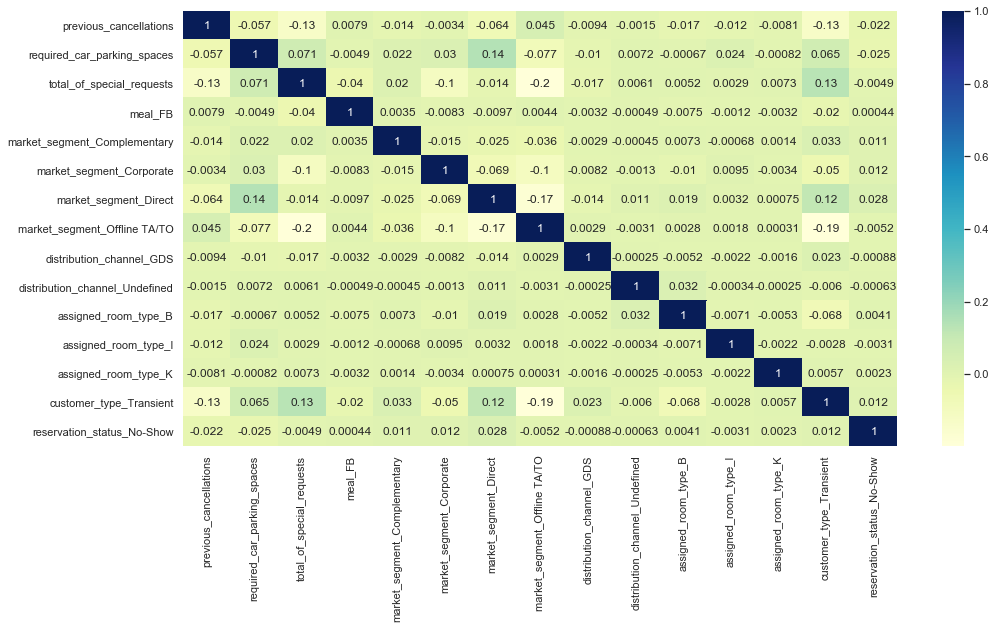

In [61]:
plt.figure(figsize = (16,8))
sns.heatmap(X_train[col].corr(), cmap = 'YlGnBu', annot =True)

In [62]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [63]:
X_train.head()

,previous_cancellations,required_car_parking_spaces,total_of_special_requests,meal_FB,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Offline TA/TO,distribution_channel_GDS,distribution_channel_Undefined,assigned_room_type_B,assigned_room_type_I,assigned_room_type_K,customer_type_Transient,reservation_status_No-Show
81058,-0.233601,-0.251395,0.559671,0,0,0,0,0,0,0,0,0,0,1,0
94468,-0.233601,-0.251395,3.118885,0,0,0,0,0,0,0,0,0,0,1,0
69244,4.280806,-0.251395,-0.719936,0,0,0,0,0,0,0,0,0,0,0,0
26051,-0.233601,-0.251395,-0.719936,0,0,1,0,0,0,0,0,0,0,1,0
110908,-0.233601,-0.251395,1.839278,0,0,0,0,0,0,0,0,0,0,1,0


In [64]:
# Import statsmodels

import statsmodels.api as sm

In [65]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            is_canceled   No. Observations:                77823
Model:                            GLM   Df Residuals:                    77807
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38604.
Date:                Thu, 16 Jul 2020   Deviance:                       77207.
Time:                        20:51:37   Pearson chi2:                 7.75e+04
No. Iterations:                    28                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.6696   1495.920     -0.002      0.998   -2935.620    2928.280
previous_cancellations             1.1938      0.033     36.681      0.000       1.130       1.258
required_car_parking_spaces      -10.0276   5950.484     -0.002      0.999   -1.17e+04    1.17e+04
total_of_special_requests         -0.7323      0.011    -67.379      0.000      -0.754      -0.711
meal_FB                            0.9763      0.113      8.668      0.000       0.756       1.197
market_segment_Complementary      -2.1047      0.179    -11.776      0.000      -2.455      -1.754
market_segment_Corporate          -1.5178      0.054    -28.336      0.000      -1.623      -1.413
market_segment_Direct             -1.8250      0.038    -48.623      0.000      -1.899      -1.751
market_segment_Offline TA/TO      -0.7158      0.023    -30.848      0.000      -0.761      -0.670
distribution_channel_GDS          -1.9472      0.252     -7.730      0.000      -2.441      -1.453
distribution_channel_Undefined    25.0314   1.78e+04      0.001      0.999   -3.49e+04    3.49e+04
assigned_room_type_B              -0.6463      0.082     -7.891      0.000      -0.807      -0.486
assigned_room_type_I              -3.8620      0.629     -6.137      0.000      -5.096      -2.629
assigned_room_type_K              -2.4478      0.423     -5.789      0.000      -3.277      -1.619
customer_type_Transient            1.4033      0.024     59.121      0.000       1.357       1.450
reservation_status_No-Show        30.9731   5.16e+04      0.001      1.000   -1.01e+05    1.01e+05
==================================================================================================
"""

In [66]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,customer_type_Transient,1.35
6,market_segment_Direct,1.18
7,market_segment_Offline TA/TO,1.18
2,total_of_special_requests,1.09
5,market_segment_Corporate,1.05
0,previous_cancellations,1.03
1,required_car_parking_spaces,1.03
3,meal_FB,1.01
4,market_segment_Complementary,1.01
10,assigned_room_type_B,1.01


In [68]:
X_train.drop('reservation_status_No-Show', axis = 1, inplace = True)

In [69]:
X_train_sm = sm.add_constant(X_train)
model_2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model_2_fit = model_2.fit()
model_2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            is_canceled   No. Observations:                77823
Model:                            GLM   Df Residuals:                    77808
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39612.
Date:                Thu, 16 Jul 2020   Deviance:                       79224.
Time:                        20:51:42   Pearson chi2:                 7.79e+04
No. Iterations:                    28                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.6195   1501.365     -0.002      0.998   -2946.240    2939.002
previous_cancellations             1.1794      0.032     36.337      0.000       1.116       1.243
required_car_parking_spaces      -10.0245   5972.141     -0.002      0.999   -1.17e+04    1.17e+04
total_of_special_requests         -0.7127      0.011    -66.967      0.000      -0.734      -0.692
meal_FB                            0.9617      0.111      8.632      0.000       0.743       1.180
market_segment_Complementary      -1.8793      0.161    -11.651      0.000      -2.195      -1.563
market_segment_Corporate          -1.4364      0.052    -27.786      0.000      -1.538      -1.335
market_segment_Direct             -1.6931      0.036    -47.533      0.000      -1.763      -1.623
market_segment_Offline TA/TO      -0.6976      0.023    -30.438      0.000      -0.743      -0.653
distribution_channel_GDS          -1.8998      0.247     -7.703      0.000      -2.383      -1.416
distribution_channel_Undefined    24.8223   1.79e+04      0.001      0.999    -3.5e+04     3.5e+04
assigned_room_type_B              -0.6061      0.079     -7.645      0.000      -0.761      -0.451
assigned_room_type_I              -3.5518      0.543     -6.547      0.000      -4.615      -2.488
assigned_room_type_K              -2.1876      0.371     -5.898      0.000      -2.915      -1.461
customer_type_Transient            1.3714      0.023     58.903      0.000       1.326       1.417
==================================================================================================
"""

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,customer_type_Transient,1.35
6,market_segment_Direct,1.18
7,market_segment_Offline TA/TO,1.18
2,total_of_special_requests,1.09
5,market_segment_Corporate,1.05
0,previous_cancellations,1.03
1,required_car_parking_spaces,1.03
3,meal_FB,1.01
4,market_segment_Complementary,1.01
10,assigned_room_type_B,1.01


In [71]:
X_train = X_train.drop('distribution_channel_Undefined', axis = 1)

In [72]:
X_train_sm = sm.add_constant(X_train)
model_3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model_3_fit = model_3.fit()
model_3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            is_canceled   No. Observations:                77823
Model:                            GLM   Df Residuals:                    77809
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39619.
Date:                Thu, 16 Jul 2020   Deviance:                       79237.
Time:                        20:51:45   Pearson chi2:                 7.80e+04
No. Iterations:                    27                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.7613    764.454     -0.004      0.997   -1501.064    1495.541
previous_cancellations           1.1793      0.032     36.333      0.000       1.116       1.243
required_car_parking_spaces     -6.6132   3040.852     -0.002      0.998   -5966.574    5953.347
total_of_special_requests       -0.7125      0.011    -66.955      0.000      -0.733      -0.692
meal_FB                          0.9616      0.111      8.632      0.000       0.743       1.180
market_segment_Complementary    -1.8793      0.161    -11.652      0.000      -2.195      -1.563
market_segment_Corporate        -1.4363      0.052    -27.785      0.000      -1.538      -1.335
market_segment_Direct           -1.6919      0.036    -47.516      0.000      -1.762      -1.622
market_segment_Offline TA/TO    -0.6977      0.023    -30.443      0.000      -0.743      -0.653
distribution_channel_GDS        -1.8994      0.247     -7.702      0.000      -2.383      -1.416
assigned_room_type_B            -0.5945      0.079     -7.522      0.000      -0.749      -0.440
assigned_room_type_I            -3.5517      0.543     -6.547      0.000      -4.615      -2.488
assigned_room_type_K            -2.1875      0.371     -5.897      0.000      -2.915      -1.460
customer_type_Transient          1.3706      0.023     58.880      0.000       1.325       1.416
================================================================================================
"""

In [73]:
X_train = X_train.drop('required_car_parking_spaces', axis = 1)

In [74]:
X_train_sm = sm.add_constant(X_train)
model_4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model_4_fit = model_4.fit()
model_4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            is_canceled   No. Observations:                77823
Model:                            GLM   Df Residuals:                    77810
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41369.
Date:                Thu, 16 Jul 2020   Deviance:                       82739.
Time:                        20:51:46   Pearson chi2:                 8.38e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.1563      0.022    -51.646      0.000      -1.200      -1.112
previous_cancellations           1.1579      0.030     38.620      0.000       1.099       1.217
total_of_special_requests       -0.7235      0.011    -68.746      0.000      -0.744      -0.703
meal_FB                          0.9244      0.107      8.608      0.000       0.714       1.135
market_segment_Complementary    -1.9025      0.159    -11.929      0.000      -2.215      -1.590
market_segment_Corporate        -1.5001      0.051    -29.430      0.000      -1.600      -1.400
market_segment_Direct           -1.8076      0.035    -51.808      0.000      -1.876      -1.739
market_segment_Offline TA/TO    -0.6570      0.023    -29.024      0.000      -0.701      -0.613
distribution_channel_GDS        -1.8067      0.247     -7.328      0.000      -2.290      -1.324
assigned_room_type_B            -0.5853      0.078     -7.488      0.000      -0.739      -0.432
assigned_room_type_I            -3.6067      0.537     -6.716      0.000      -4.659      -2.554
assigned_room_type_K            -2.1194      0.370     -5.727      0.000      -2.845      -1.394
customer_type_Transient          1.3174      0.023     57.118      0.000       1.272       1.363
================================================================================================
"""

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,customer_type_Transient,1.35
6,market_segment_Offline TA/TO,1.18
5,market_segment_Direct,1.16
1,total_of_special_requests,1.09
4,market_segment_Corporate,1.05
0,previous_cancellations,1.02
2,meal_FB,1.01
3,market_segment_Complementary,1.01
8,assigned_room_type_B,1.01
7,distribution_channel_GDS,1.00


## Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [76]:
y_train_pred = model_4_fit.predict(sm.add_constant(X_train))
y_train_pred[:10]

81058     0.374193
94468     0.085808
69244     0.986893
26051     0.251891
110908    0.191530
2273      0.374193
39561     0.173239
107017    0.374193
109436    0.031846
44520     0.601460
dtype: float64

In [77]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.37419254, 0.08580849, 0.98689251, 0.25189091, 0.19153029,
       0.37419254, 0.17323932, 0.37419254, 0.03184564, 0.60146013])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities`

In [78]:
y_train_pred_final = pd.DataFrame({'Cancellation': y_train.values, 'Cancel_Prob': y_train_pred})
y_train_pred_final.head()

,Cancellation,Cancel_Prob
0,0,0.374193
1,0,0.085808
2,1,0.986893
3,0,0.251891
4,0,0.191530


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [79]:
y_train_pred_final['Predicted'] = y_train_pred_final['Cancel_Prob'].map(lambda x : 1 if x >0.5 else 0)
y_train_pred_final['Cancel_Prob'] = round(y_train_pred_final['Cancel_Prob']*100,2)
y_train_pred_final.head()

,Cancellation,Cancel_Prob,Predicted
0,0,37.42,0
1,0,8.58,0
2,1,98.69,1
3,0,25.19,0
4,0,19.15,0


In [80]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [81]:
confusion = metrics.confusion_matrix(y_train_pred_final['Cancellation'], y_train_pred_final['Predicted'] )
print(confusion)

[[43289  5794]
 [13324 15416]]


In [82]:
acc = round(metrics.accuracy_score(y_train_pred_final['Cancellation'], y_train_pred_final['Predicted'] ),2)
print('Accuracy of the train model is {0}'.format(acc))

Accuracy of the train model is 0.75


In [83]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
# Calculate the sensitivity

TP/(TP+FN)

0.5363952679192763

In [85]:
# Calculate the specificity

TN/(TN+FP)

0.8819550557219404

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [86]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Cancellation'], y_train_pred_final['Cancel_Prob'], drop_intermediate = False )

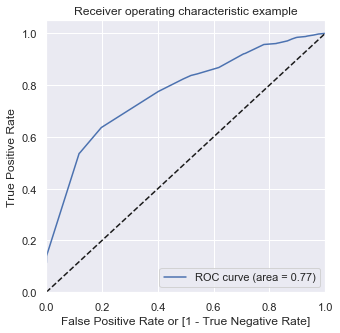

In [88]:
draw_roc(y_train_pred_final['Cancellation'], y_train_pred_final['Cancel_Prob'])

In [89]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Cancel_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Cancellation,Cancel_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,37.42,0,1,1,1,1,1,1,1,1,1,1
1,0,8.58,0,1,1,1,1,1,1,1,1,1,1
2,1,98.69,1,1,1,1,1,1,1,1,1,1,1
3,0,25.19,0,1,1,1,1,1,1,1,1,1,1
4,0,19.15,0,1,1,1,1,1,1,1,1,1,1


In [90]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Cancellation'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.369300  1.000000  0.000000
0.1   0.1  0.369364  1.000000  0.000102
0.2   0.2  0.369505  0.999965  0.000346
0.3   0.3  0.369814  0.999930  0.000856
0.4   0.4  0.369968  0.999930  0.001100
0.5   0.5  0.370276  0.999896  0.001610
0.6   0.6  0.370559  0.999896  0.002058
0.7   0.7  0.371304  0.999826  0.003280
0.8   0.8  0.371368  0.999826  0.003382
0.9   0.9  0.371497  0.999826  0.003586


### In our case we want the model whihc we have build to have high sensitivity and go with the cut-off 0.3

In [92]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Cancel_Prob'].map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Cancellation,Cancel_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,37.42,0,1,1,1,1,1,1,1,1,1,1,1
1,0,8.58,0,1,1,1,1,1,1,1,1,1,1,1
2,1,98.69,1,1,1,1,1,1,1,1,1,1,1,1
3,0,25.19,0,1,1,1,1,1,1,1,1,1,1,1
4,0,19.15,0,1,1,1,1,1,1,1,1,1,1,1


In [93]:
acc = round(metrics.accuracy_score(y_train_pred_final['Cancellation'], y_train_pred_final['final_predicted'] ),2)
print('Accuracy of the train model is {0}'.format(acc))

Accuracy of the train model is 0.37


In [94]:
confusion2 = metrics.confusion_matrix(y_train_pred_final['Cancellation'], y_train_pred_final['final_predicted'])
confusion2

array([[   48, 49035],
       [    2, 28738]], dtype=int64)

In [95]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [96]:
# Calculate Sensitivity

TP/(TP+FN)

0.9999304105775922

In [97]:
# Calculate Specificity

TN/(TN+FP)

0.0009779353340260376

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [98]:
X_test[hotel_numeric.columns[1:]] = scaler.fit_transform(X_test[hotel_numeric.columns[1:]])

In [99]:
X_test = X_test[col]
X_test.head()

,previous_cancellations,required_car_parking_spaces,total_of_special_requests,meal_FB,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Offline TA/TO,distribution_channel_GDS,distribution_channel_Undefined,assigned_room_type_B,assigned_room_type_I,assigned_room_type_K,customer_type_Transient,reservation_status_No-Show
37954,-0.230957,-0.25317,-0.723430,0,0,0,1,0,0,0,0,0,0,1,0
28076,-0.230957,-0.25317,-0.723430,0,0,0,1,0,0,0,0,0,0,1,0
56036,-0.230957,-0.25317,1.839213,0,0,0,0,0,0,0,0,0,0,1,0
65132,-0.230957,-0.25317,0.557892,0,0,0,0,0,0,0,0,0,0,1,0
24088,-0.230957,3.94991,-0.723430,0,0,0,1,0,0,0,0,0,0,1,0


In [100]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [101]:
# Drop the required columns from X_test as well

X_test.drop(['reservation_status_No-Show','distribution_channel_Undefined','required_car_parking_spaces'], inplace = True, axis =1)

In [102]:
y_test_pred = model_4_fit.predict(sm.add_constant(X_test))
y_test_pred[:10]

37954     0.199329
28076     0.199329
56036     0.192012
65132     0.375211
24088     0.199329
34200     0.199329
64659     0.440330
83883     0.138554
110852    0.089679
93577     0.192012
dtype: float64

In [103]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
37954,0.199329
28076,0.199329
56036,0.192012
65132,0.375211
24088,0.199329


In [104]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [105]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_pred_1, y_test_df], axis = 1)
y_pred_final = y_pred_final.rename(columns = {0 : 'Cancellation_Proability'})
y_pred_final['Cancellation_Proability'] = round(y_pred_final['Cancellation_Proability']*100,2)
y_pred_final.head()

,Cancellation_Proability,is_canceled
0,19.93,0
1,19.93,0
2,19.20,1
3,37.52,1
4,19.93,0


In [106]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final['Cancellation_Proability'].map(lambda x : 1 if x >0.37 else 0)
y_pred_final.head()

,Cancellation_Proability,is_canceled,final_predicted
0,19.93,0,1
1,19.93,0,1
2,19.20,1,1
3,37.52,1,1
4,19.93,0,1


In [107]:
# Let's check the overall accuracy

test_acc = round(metrics.accuracy_score(y_pred_final['is_canceled'], y_pred_final['final_predicted']),2)
print('Accuracy of the test model is {0}'.format(test_acc))

Accuracy of the test model is 0.37


In [108]:
confusion2 = metrics.confusion_matrix(y_pred_final['is_canceled'], y_pred_final['final_predicted'] )
confusion2

array([[   22, 20931],
       [    1, 12399]], dtype=int64)

In [109]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [110]:
# Calculate sensitivity
round(TP / float(TP+FN), 3)

1.0

In [111]:
# Calculate specificity
round(TN / float(TN+FP), 3)

0.001